In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.seterr ("ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [4]:
data = pd.read_csv ("/home/sanvi/Downloads/clustering_data(1).csv", low_memory = False)
data = data.dropna()
data = data.drop_duplicates()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148223 entries, 0 to 157125
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CircleName    148223 non-null  object
 1   RegionName    148223 non-null  object
 2   DivisionName  148223 non-null  object
 3   OfficeName    148223 non-null  object
 4   Pincode       148223 non-null  int64 
 5   OfficeType    148223 non-null  object
 6   Delivery      148223 non-null  object
 7   District      148223 non-null  object
 8   StateName     148223 non-null  object
 9   Latitude      148223 non-null  object
 10  Longitude     148223 non-null  object
dtypes: int64(1), object(10)
memory usage: 13.6+ MB


In [6]:
df = data[(data['Pincode'] > 120000) & (data['Pincode'] < 140000)]

In [7]:
df

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
12647,Haryana Circle,DivReportingCircle,Karnal Division,Baniya Khera B.O,126110,BO,Delivery,JIND,HARYANA,29.45,25.3
12648,Haryana Circle,DivReportingCircle,Karnal Division,Lajwan Kalan B.O,126101,BO,Delivery,JIND,HARYANA,29.3,25.3
12649,Haryana Circle,DivReportingCircle,Karnal Division,Malwi B.O,126101,BO,Delivery,JIND,HARYANA,29.3,25.3
12650,Haryana Circle,DivReportingCircle,Karnal Division,Mandi Kalan B.O,126125,BO,Delivery,JIND,HARYANA,29.45,36.3
12651,Haryana Circle,DivReportingCircle,Karnal Division,Sandil B.O,126125,BO,Delivery,JIND,HARYANA,33.3,25.3
...,...,...,...,...,...,...,...,...,...,...,...
141084,Haryana Circle,DivReportingCircle,Sonepat Division,Nahri SO,131103,PO,Delivery,SONIPAT,HARYANA,28.8556667,77.0456667
141085,Haryana Circle,DivReportingCircle,Sonepat Division,Sonipat Kty SO,131001,PO,Non Delivery,SONIPAT,HARYANA,29.0001389,77.0001389
141097,Haryana Circle,DivReportingCircle,Sonepat Division,Juan SO,131024,PO,Delivery,SONIPAT,HARYANA,28.9330278,76.9749722
141098,Haryana Circle,DivReportingCircle,Sonepat Division,Purkhas SO,131102,PO,Delivery,SONIPAT,HARYANA,29.1101389,76.9445278


In [8]:
df.Longitude

12647           25.3
12648           25.3
12649           25.3
12650           36.3
12651           25.3
             ...    
141084    77.0456667
141085    77.0001389
141097    76.9749722
141098    76.9445278
142305    77.0179722
Name: Longitude, Length: 2685, dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2685 entries, 12647 to 142305
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CircleName    2685 non-null   object
 1   RegionName    2685 non-null   object
 2   DivisionName  2685 non-null   object
 3   OfficeName    2685 non-null   object
 4   Pincode       2685 non-null   int64 
 5   OfficeType    2685 non-null   object
 6   Delivery      2685 non-null   object
 7   District      2685 non-null   object
 8   StateName     2685 non-null   object
 9   Latitude      2685 non-null   object
 10  Longitude     2685 non-null   object
dtypes: int64(1), object(10)
memory usage: 251.7+ KB


In [10]:
import geopandas as gpd
haryana = gpd.read_file('haryana.kml')

In [11]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy (df.Longitude, df.Latitude))
gdf = gdf.set_crs(haryana.crs)
df = gdf[gdf.within(haryana.unary_union)]

/tmp/ipykernel_3679/2415910902.py:3: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  df = gdf[gdf.within(haryana.unary_union)]


In [12]:
df

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude,geometry
21800,Haryana Circle,DivReportingCircle,Ambala Division,Tikkar B.O,134205,BO,Delivery,PANCHKULA,HARYANA,30.378183,76.776692,POINT (76.77669 30.37818)
22110,Haryana Circle,DivReportingCircle,Ambala Division,Bhadauli B.O,134203,BO,Delivery,AMBALA,HARYANA,30.3824743,77.0617433,POINT (77.06174 30.38247)
22111,Haryana Circle,DivReportingCircle,Ambala Division,Bhareri Kalan B.O,134203,BO,Delivery,AMBALA,HARYANA,30.45733,77.13466,POINT (77.13466 30.45733)
22112,Haryana Circle,DivReportingCircle,Ambala Division,Bhurewala B.O,134203,BO,Delivery,AMBALA,HARYANA,30.382474,77.0617433,POINT (77.06174 30.38247)
22113,Haryana Circle,DivReportingCircle,Ambala Division,Kathe Majra B.O,134203,BO,Delivery,AMBALA,HARYANA,30.45733,77.13466,POINT (77.13466 30.45733)
...,...,...,...,...,...,...,...,...,...,...,...,...
141084,Haryana Circle,DivReportingCircle,Sonepat Division,Nahri SO,131103,PO,Delivery,SONIPAT,HARYANA,28.8556667,77.0456667,POINT (77.04567 28.85567)
141085,Haryana Circle,DivReportingCircle,Sonepat Division,Sonipat Kty SO,131001,PO,Non Delivery,SONIPAT,HARYANA,29.0001389,77.0001389,POINT (77.00014 29.00014)
141097,Haryana Circle,DivReportingCircle,Sonepat Division,Juan SO,131024,PO,Delivery,SONIPAT,HARYANA,28.9330278,76.9749722,POINT (76.97497 28.93303)
141098,Haryana Circle,DivReportingCircle,Sonepat Division,Purkhas SO,131102,PO,Delivery,SONIPAT,HARYANA,29.1101389,76.9445278,POINT (76.94453 29.11014)


In [13]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2269 entries, 21800 to 142305
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   CircleName    2269 non-null   object  
 1   RegionName    2269 non-null   object  
 2   DivisionName  2269 non-null   object  
 3   OfficeName    2269 non-null   object  
 4   Pincode       2269 non-null   int64   
 5   OfficeType    2269 non-null   object  
 6   Delivery      2269 non-null   object  
 7   District      2269 non-null   object  
 8   StateName     2269 non-null   object  
 9   Latitude      2269 non-null   object  
 10  Longitude     2269 non-null   object  
 11  geometry      2269 non-null   geometry
dtypes: geometry(1), int64(1), object(10)
memory usage: 230.4+ KB


In [14]:
lat = df.iloc[:,9].values
lon = df.iloc[:,10].values

In [15]:
lat0 = []
lon0 = []
for i in range(lon.shape[0]):
    lat[i] = float(lat[i])
    lon[i] = float(lon[i])
    lat0.append(lat[i])
    lon0.append(lon[i])

In [16]:
lon.shape

(2269,)

In [17]:
data = {
    'Latitude': lat0,  # Example latitude data
    'Longitude': lon0  # Example longitude data
}

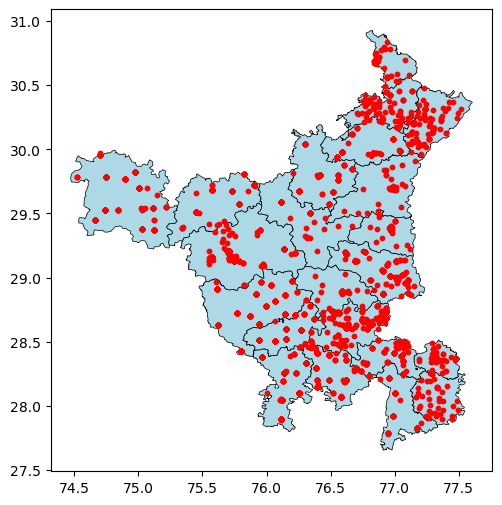

In [18]:
geometry = gpd.points_from_xy(data['Longitude'], data['Latitude'])
gdf = gpd.GeoDataFrame(data, geometry= geometry)

fig, ax = plt.subplots(figsize=(6, 6))
haryana.plot(ax=ax, color='lightblue', edgecolor='k', linewidth=0.5)
gdf.plot(ax=ax, color='red', marker='o', markersize=10, label='Your Data')
plt.show()

In [19]:
k=3
import random, time

In [20]:
def random_datapoints (k,lon,lat):
    #random.seed()
    a = np.zeros(k)
    points = np.zeros ((k,2))
    for i in range (k):
        a = random.randint (0,lon.shape[0]-1)
        points[i] = [lon[a], lat[a]]
    return points

In [21]:
def euclid_dist (k,lon,lat,z):
    m = lon.shape[0]
    #print('n:',m)
    clusters = np.zeros (m)
    #print('clusters',clusters)
    #z = random_datapoints (k,lon,lat)
    #print('z :',z)
    x = z[:,0]; y = z[:,1]
    #print('x:',x)
    for i in range (m):
        dist = np.zeros((k));
        #print('dist :',dist)
        for j in range (k):
            dist[j] = np.sqrt((lon[i] - x[j])**2 + (lat[i] - y[j])**2)
            #print('dist :',dist)
            if (j==0):
                min = dist[j]
                clusters[i] = j
                
            elif (dist[j] < min):
                min = dist[j]
                clusters[i] = j
            #print('clusters :',clusters)
    return clusters      

In [22]:
def clusters (k,lon, lat, z):
    a = euclid_dist (k,lon,lat,z)
    num_in_clstr = np.zeros(k)
    arrays = [[] for _ in range(k)]
    
    for i in range (a.shape[0]):
        for j in range (k):
            if (a[i]== j):
                arrays[j].append([lon[i],lat[i]])
                num_in_clstr[j] += 1

    return arrays, num_in_clstr

In [23]:
def variance (k,lon,lat,z):
    c,num = clusters(k,lon,lat,z)
    mu = np.zeros ((k,2))
    var = np.zeros ((k,2))
    for i in range(k): 
        if (len(c[i]) != 0):
            mu[i] = np.mean(c[i], axis = 0)
        else:
            mu[i] = 0
    #print (mu)
    
    for m in range (k):
        for i in range (int(num[m])):
            var[m] = var[m] + (mu[m] - c[m][i])**2
        if (num[m] == 0):
            var[m] = 0
    
    return var

In [24]:
def variance_sum (k,lon,lat,z):
    var = variance (k,lon,lat,z)
    sum_x = 0; sum_y = 0
    for i in range (k):
        sum_x += var[i,0]
        sum_y += var[i,1]
    return sum_x + sum_y

In [25]:
def centroid (k,lon,lat,z):
    clstr,_ = clusters (k,lon,lat,z)
    mu = np.zeros((k,2))
    for i in range (k):
        x = (clstr[i])
        if (len(clstr[i]) != 0):
            mu[i] = np.mean(clstr[i], axis = 0)
        else:
            mu[i] = 0
    return mu

In [26]:
def loop (k,lon,lat,num_i):
    z = random_datapoints (k,lon,lat)
    for i in range (num_i):
        c,_ = clusters (k,lon,lat,z)
        z = centroid (k,lon,lat,z)

    #for i in range (k):
        #c[i] = np.array(c[i])
    
    return z,c

In [27]:
def call_till_nonzero(i):
    while True:
        final,c = loop (i,lon,lat,20)
        n=0
        for j in range(i):
            if (len(c[j]) != 0):
                n+=1
             
        if (n==i):
            break
            
    return final,c

In [28]:
n = np.zeros (10)
for i in range (1,10):
    f,arr = call_till_nonzero (i)
    n[i] = variance_sum (i,lon,lat,f)

In [29]:
n

array([   0.        , 2128.08564059, 1331.10949592,  590.07413087,
        452.39962682,  364.45041167,  327.14591303,  217.96450336,
        187.8881506 ,  180.87406256])

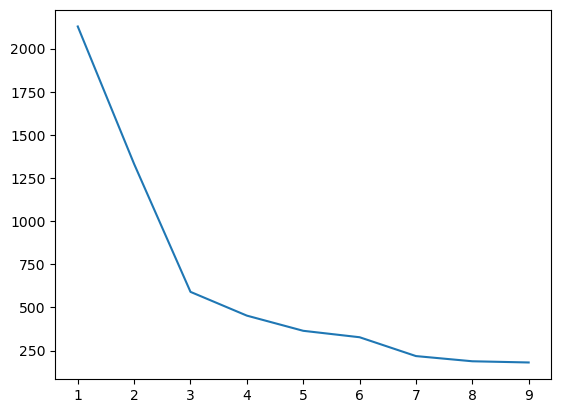

In [30]:
plt.plot(np.arange(1,10) ,n[1:])

In [31]:
def graph (z,c):
    c[0] = np.asarray (c[0])
    c[1] = np.asarray (c[1])
    c[2] = np.asarray (c[2])
    
    fig, ax = plt.subplots(figsize=(10, 8
                                   ))
    haryana.plot(ax=ax, color='oldlace', edgecolor='k', linewidth=0.5)
    ax.scatter(c[0][:,0], c[0][:,1], linewidths = 0.25, color = 'darkmagenta')
    ax.scatter(c[1][:,0], c[1][:,1], linewidths = 0.25, color = 'steelblue')
    ax.scatter(c[2][:,0], c[2][:,1], linewidths = 0.25, color = 'darkred')
    ax.scatter(z[:,0], z[:,1], linewidths = 10, marker = 'x', color = 'orange')
    plt.show()

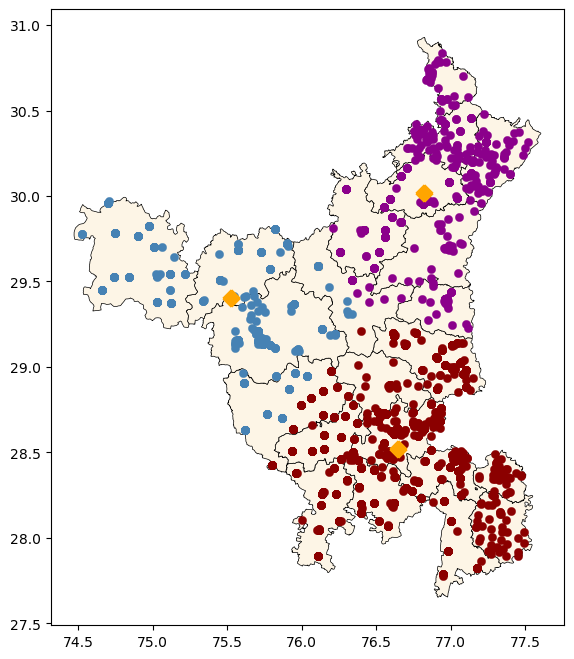

In [32]:
z,c = call_till_nonzero(3); graph (z,c)

In [33]:
def c_conversion(c):
    longitude = []
    for i in range (len(c)):
        longitude.append((c[i][0]))
    return longitude

In [34]:
df_1 = df[df['Longitude'].isin(c_conversion(c[0]))]

In [35]:
df_1

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude,geometry
21800,Haryana Circle,DivReportingCircle,Ambala Division,Tikkar B.O,134205,BO,Delivery,PANCHKULA,HARYANA,30.378183,76.776692,POINT (76.77669 30.37818)
22110,Haryana Circle,DivReportingCircle,Ambala Division,Bhadauli B.O,134203,BO,Delivery,AMBALA,HARYANA,30.382474,77.061743,POINT (77.06174 30.38247)
22111,Haryana Circle,DivReportingCircle,Ambala Division,Bhareri Kalan B.O,134203,BO,Delivery,AMBALA,HARYANA,30.45733,77.13466,POINT (77.13466 30.45733)
22112,Haryana Circle,DivReportingCircle,Ambala Division,Bhurewala B.O,134203,BO,Delivery,AMBALA,HARYANA,30.382474,77.061743,POINT (77.06174 30.38247)
22113,Haryana Circle,DivReportingCircle,Ambala Division,Kathe Majra B.O,134203,BO,Delivery,AMBALA,HARYANA,30.45733,77.13466,POINT (77.13466 30.45733)
...,...,...,...,...,...,...,...,...,...,...,...,...
130013,Haryana Circle,DivReportingCircle,Karnal Division,Panipat NFL S.O,132106,PO,Delivery,PANIPAT,HARYANA,29.362139,76.972306,POINT (76.97231 29.36214)
130915,Haryana Circle,DivReportingCircle,Ambala Division,Sadar Bazar S.O (Ambala),133001,PO,Non Delivery,AMBALA,HARYANA,30.355655,76.774474,POINT (76.77447 30.35565)
132262,Haryana Circle,DivReportingCircle,Karnal Division,Nilokheri GIP S.O,132117,PO,Non Delivery,KARNAL,HARYANA,29.835111,76.917639,POINT (76.91764 29.83511)
132263,Haryana Circle,DivReportingCircle,Karnal Division,Panipat Khadi Ashram S.O,132104,PO,Delivery,PANIPAT,HARYANA,29.371167,76.975,POINT (76.975 29.37117)


In [36]:
a1 = df_1['District'].value_counts()
a1

District
AMBALA         128
KAITHAL        123
KURUKSHETRA    110
YAMUNANAGAR    109
KARNAL          73
PANCHKULA       39
PANIPAT         20
HISAR           11
SONIPAT          7
JIND             7
FATEHABAD        3
PALWAL           3
ROHTAK           1
Name: count, dtype: int64

In [37]:
df_1['DivisionName'].value_counts()

DivisionName
Ambala Division         276
Kurukshetra Division    233
Karnal Division         100
Hissar Division          14
Sonepat Division          7
Faridabad Division        3
Rohtak Division           1
Name: count, dtype: int64

In [38]:
df_1['Delivery'].value_counts()

Delivery
Delivery        569
Non Delivery     65
Name: count, dtype: int64

In [39]:
df_2 = df[df['Longitude'].isin(c_conversion(c[1]))]

In [40]:
df_2

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude,geometry
32005,Haryana Circle,DivReportingCircle,Hissar Division,Landhari BO,125047,BO,Delivery,HISAR,HARYANA,29.302081,75.660084,POINT (75.66008 29.30208)
32006,Haryana Circle,DivReportingCircle,Hissar Division,Sandol BO,125047,BO,Delivery,HISAR,HARYANA,29.348522,75.734242,POINT (75.73424 29.34852)
32007,Haryana Circle,DivReportingCircle,Hissar Division,Gangwa BO,125007,BO,Delivery,HISAR,HARYANA,29.139432,75.582458,POINT (75.58246 29.13943)
32008,Haryana Circle,DivReportingCircle,Hissar Division,Chakpanihar BO,125007,BO,Delivery,HISAR,HARYANA,29.132451,75.55007,POINT (75.55007 29.13245)
32009,Haryana Circle,DivReportingCircle,Hissar Division,Badhawar BO,125121,BO,Delivery,HISAR,HARYANA,29.329776,75.926768,POINT (75.92677 29.32978)
...,...,...,...,...,...,...,...,...,...,...,...,...
133571,Haryana Circle,DivReportingCircle,Hissar Division,Jakhal Mandi SO,125133,PO,Delivery,FATEHABAD,HARYANA,29.808972,75.82325,POINT (75.82325 29.80897)
133618,Haryana Circle,DivReportingCircle,Hissar Division,Rattia SO,125051,PO,Delivery,FATEHABAD,HARYANA,29.685306,75.576278,POINT (75.57628 29.68531)
135613,Haryana Circle,DivReportingCircle,Hissar Division,Narnaund SO,125039,PO,Delivery,HISAR,HARYANA,29.224611,76.13875,POINT (76.13875 29.22461)
135614,Haryana Circle,DivReportingCircle,Hissar Division,Pabra SO,125112,PO,Delivery,HISAR,HARYANA,29.574333,75.786306,POINT (75.78631 29.57433)


In [41]:
def dataframe (i):
    dframe = df[df['Longitude'].isin(c_conversion(c[i]))]
    print(dframe['District'].value_counts())
    print(dframe['Delivery'].value_counts())

In [42]:
dataframe(0)

District
AMBALA         128
KAITHAL        123
KURUKSHETRA    110
YAMUNANAGAR    109
KARNAL          73
PANCHKULA       39
PANIPAT         20
HISAR           11
SONIPAT          7
JIND             7
FATEHABAD        3
PALWAL           3
ROHTAK           1
Name: count, dtype: int64
Delivery
Delivery        569
Non Delivery     65
Name: count, dtype: int64


In [43]:
dataframe(1)

District
SIRSA        161
HISAR        149
FATEHABAD    132
BHIWANI       68
JIND          25
KARNAL        19
PANIPAT       10
PANCHKULA      5
AMBALA         1
Name: count, dtype: int64
Delivery
Delivery        539
Non Delivery     31
Name: count, dtype: int64


In [44]:
dataframe(2)

District
SONIPAT         165
JHAJJAR         145
REWARI          130
MAHENDRAGARH    119
ROHTAK          111
GURUGRAM         99
BHIWANI          81
CHARKI DADRI     77
NUH              56
FARIDABAD        45
PALWAL           44
HISAR             9
YAMUNANAGAR       2
JIND              1
Name: count, dtype: int64
Delivery
Delivery        964
Non Delivery    120
Name: count, dtype: int64
